# Import data

In [1]:
import pandas as pd

df = pd.read_excel (r'../data/all_submission_files.xlsx')
print(df)

      report_end_date      cik              nameOfIssuer      titleOfClass  \
0          2020-09-30  1129770  SPDR S&P 500                           COM   
1          2020-09-30  1129770  SPDR Dow Jones Ind                     COM   
2          2020-09-30  1129770  Ishares Russell                        COM   
3          2020-09-30  1129770  Invesco QQQ TRUST                      COM   
4          2020-09-30  1129770  iShares Russell 20                     COM   
...               ...      ...                       ...               ...   
46767      2020-12-31  1744091                ISHARES TR  RUS 2000 GRW ETF   
46768      2020-12-31  1744091         ETF SER SOLUTIONS       US GLB JETS   
46769      2020-12-31  1744091           BEYOND MEAT INC               COM   
46770      2020-12-31  1744091             SUNPOWER CORP               COM   
46771      2020-12-31  1744091      LOCKHEED MARTIN CORP               COM   

           cusip        value  sshPrnamt sshPrnamtType  
0     

# check for missing values

In [2]:
df.isna().sum()

report_end_date    0
cik                0
nameOfIssuer       1
titleOfClass       1
cusip              0
value              0
sshPrnamt          0
sshPrnamtType      0
dtype: int64

## drop missing values (remove rows having missing values)

In [3]:
df = df.dropna(axis=0)
df

,report_end_date,cik,nameOfIssuer,titleOfClass,cusip,value,sshPrnamt,sshPrnamtType
0,2020-09-30,1129770,SPDR S&P 500,COM,824348106,70889608000,211680,SH
1,2020-09-30,1129770,SPDR Dow Jones Ind,COM,78467x109,29886300000,107698,SH
2,2020-09-30,1129770,Ishares Russell,COM,464287622,26825894000,143339,SH
3,2020-09-30,1129770,Invesco QQQ TRUST,COM,73935a104,21672909000,78005,SH
4,2020-09-30,1129770,iShares Russell 20,COM,464287655,9434973000,62988,SH
...,...,...,...,...,...,...,...,...
46767,2020-12-31,1744091,ISHARES TR,RUS 2000 GRW ETF,464287648,224000,782,SH
46768,2020-12-31,1744091,ETF SER SOLUTIONS,US GLB JETS,26922A842,219000,9794,SH
46769,2020-12-31,1744091,BEYOND MEAT INC,COM,08862E109,218000,1740,SH
46770,2020-12-31,1744091,SUNPOWER CORP,COM,867652406,213000,8310,SH


In [4]:
df.head

<bound method NDFrame.head of       report_end_date      cik              nameOfIssuer      titleOfClass  \
0          2020-09-30  1129770  SPDR S&P 500                           COM   
1          2020-09-30  1129770  SPDR Dow Jones Ind                     COM   
2          2020-09-30  1129770  Ishares Russell                        COM   
3          2020-09-30  1129770  Invesco QQQ TRUST                      COM   
4          2020-09-30  1129770  iShares Russell 20                     COM   
...               ...      ...                       ...               ...   
46767      2020-12-31  1744091                ISHARES TR  RUS 2000 GRW ETF   
46768      2020-12-31  1744091         ETF SER SOLUTIONS       US GLB JETS   
46769      2020-12-31  1744091           BEYOND MEAT INC               COM   
46770      2020-12-31  1744091             SUNPOWER CORP               COM   
46771      2020-12-31  1744091      LOCKHEED MARTIN CORP               COM   

           cusip        value  ss

only one row is deleted due to missing values in the columns nameofIssuer and titleOfClass

# Data Formatting

convert imported data into a dataframe and print the first 10 rows

In [5]:
print('Dimension of the dataframe:',df.shape)
df.head(10)

Dimension of the dataframe: (46771, 8)


,report_end_date,cik,nameOfIssuer,titleOfClass,cusip,value,sshPrnamt,sshPrnamtType
0,2020-09-30,1129770,SPDR S&P 500,COM,824348106,70889608000,211680,SH
1,2020-09-30,1129770,SPDR Dow Jones Ind,COM,78467x109,29886300000,107698,SH
2,2020-09-30,1129770,Ishares Russell,COM,464287622,26825894000,143339,SH
3,2020-09-30,1129770,Invesco QQQ TRUST,COM,73935a104,21672909000,78005,SH
4,2020-09-30,1129770,iShares Russell 20,COM,464287655,9434973000,62988,SH
5,2020-09-30,1129770,SPDR S&P Mid-Cap 4,COM,78464a821,9351708000,27600,SH
6,2020-09-30,1129770,Amazon Com Inc,COM,023135106,1032783000,328,SH
7,2020-09-30,1129770,SPDR S&P Homebuild,COM,78464a888,879628000,16326,SH
8,2020-09-30,1129770,Central Fd Cda Ltd,COM,153501101,783173000,42703,SH
9,2020-09-30,1129770,Accelerate Diagnos,COM,00430h105,690395000,64765,SH


drop all missing values using the dropna() function

In [6]:
df.dropna(how='any',inplace=True)

examine the different data types

In [7]:
df.dtypes

report_end_date    datetime64[ns]
cik                         int64
nameOfIssuer               object
titleOfClass               object
cusip                      object
value                       int64
sshPrnamt                   int64
sshPrnamtType              object
dtype: object

descriptive statistics of the numerical variables

In [8]:
df.describe()

,cik,value,sshPrnamt
count,4.677100e+04,4.677100e+04,4.677100e+04
mean,1.333147e+06,7.083168e+07,4.115935e+05
std,3.269081e+05,1.076631e+09,3.697519e+06
min,3.149650e+05,0.000000e+00,0.000000e+00
25%,9.325400e+05,8.350000e+04,2.000000e+03
50%,1.429788e+06,5.560000e+05,1.129400e+04
75%,1.549408e+06,3.392000e+06,6.156200e+04
max,1.846995e+06,7.088961e+10,2.800908e+08


cik column also used but this has no meaning => drop this column.
descriptive statistics of the 2 numerical variables (value and sshPrnamt)

In [9]:
cols = set(df) - {'cik'}
df1 = df[list(cols)]
df1.describe()

,sshPrnamt,value
count,4.677100e+04,4.677100e+04
mean,4.115935e+05,7.083168e+07
std,3.697519e+06,1.076631e+09
min,0.000000e+00,0.000000e+00
25%,2.000000e+03,8.350000e+04
50%,1.129400e+04,5.560000e+05
75%,6.156200e+04,3.392000e+06
max,2.800908e+08,7.088961e+10


In [10]:
df['cusip'].unique()

array(['824348106', '78467x109', '464287622', ..., '9837FR100',
       '98390M103', '98872L102'], dtype=object)

it seems that the same concept is never represented in different ways so we don't need to manipulate them

# create new variable with value per share
if sshPrnamtType = PRN => value per share = sshPrnamt

if sshPrnamtType = SH => value per share = (value * 1000) / sshPrnamt
Todo: not that the dataset now has values already x 1000, so this calculation is not needed anymore.
Note: some filings contain the exact values, not values / 1000 so these will be wildly incorrect.

In [11]:
import numpy as np

In [12]:
#df['value_per_share'] = np.where(df['sshPrnamtType']=='SH',((df['value']*1000)/df['sshPrnamt']),
#                                  np.where(df['sshPrnamtType']=='PRN',df['sshPrnamt'], 0))
df['value_per_share'] = df['value'] / df['sshPrnamt']

In [13]:
print(df[['nameOfIssuer','value_per_share']])

                   nameOfIssuer  value_per_share
0      SPDR S&P 500                334890.438398
1      SPDR Dow Jones Ind          277500.974948
2      Ishares Russell             187150.001046
3      Invesco QQQ TRUST           277839.997436
4      iShares Russell 20          149790.007620
...                         ...              ...
46767                ISHARES TR       286.445013
46768         ETF SER SOLUTIONS        22.360629
46769           BEYOND MEAT INC       125.287356
46770             SUNPOWER CORP        25.631769
46771      LOCKHEED MARTIN CORP       354.385965

[46771 rows x 2 columns]


In [14]:
df.describe()

,cik,value,sshPrnamt,value_per_share
count,4.677100e+04,4.677100e+04,4.677100e+04,4.676800e+04
mean,1.333147e+06,7.083168e+07,4.115935e+05,2.721542e+03
std,3.269081e+05,1.076631e+09,3.697519e+06,3.359409e+04
min,3.149650e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.325400e+05,8.350000e+04,2.000000e+03,1.613085e+01
50%,1.429788e+06,5.560000e+05,1.129400e+04,4.868180e+01
75%,1.549408e+06,3.392000e+06,6.156200e+04,1.162853e+02
max,1.846995e+06,7.088961e+10,2.800908e+08,3.256931e+06


 # Normalisation

Trying to plot histograms for data in columns 'sshPrnamt' and 'values'. Both cannot be ploted, so listed value_counts() in the following to see the distribution of the data in those two columns. The distribution of the data seems skewed. 

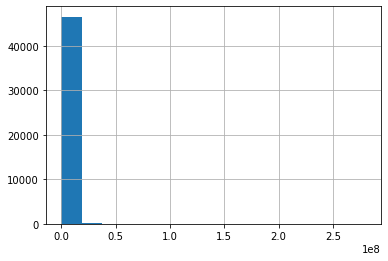

In [15]:
df['sshPrnamt'].hist(bins=15)

In [16]:
df['sshPrnamt'].value_counts()

100       611
200       346
500       294
300       264
1000      263
         ... 
21328       1
504900      1
62540       1
221266      1
37472       1
Name: sshPrnamt, Length: 26382, dtype: int64

In [17]:
df['value'].value_counts()

0              1395
1000            888
2000            744
3000            568
4000            469
               ... 
5774000           1
260615000         1
60268000          1
12243983000       1
38142000          1
Name: value, Length: 13124, dtype: int64

Because of the skewed characteristics of the data in columns, we normalise the data for columns "sshPrnamt","value" and "value_per_share" by log scaling.

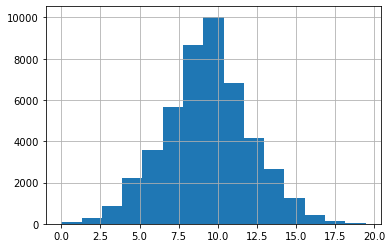

In [18]:
df['sshPrnamt'] = df['sshPrnamt'].apply(lambda x: np.log(x) if x != 0 else 0)
df['sshPrnamt'].hist(bins=15) 

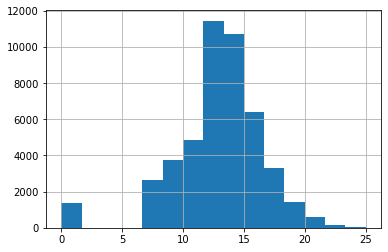

In [19]:
df['value'] = df['value'].apply(lambda x: np.log(x) if x != 0 else 0)
df['value'].hist(bins=15)

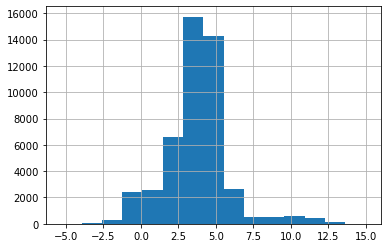

In [20]:
df['value_per_share'] = df['value_per_share'].apply(lambda x: np.log(x) if x != 0 else 0)
df['value_per_share'].hist(bins=15)

Separate 'report_end_date' into Year, Month and day.

In [21]:
df['Year'] = pd.DatetimeIndex(df['report_end_date']).year
df['Month'] = pd.DatetimeIndex(df['report_end_date']).month
df['day'] = pd.DatetimeIndex(df['report_end_date']).day
df

,report_end_date,cik,nameOfIssuer,titleOfClass,cusip,value,sshPrnamt,sshPrnamtType,value_per_share,Year,Month,day
0,2020-09-30,1129770,SPDR S&P 500,COM,824348106,24.984390,12.262831,SH,12.721559,2020,9,30
1,2020-09-30,1129770,SPDR Dow Jones Ind,COM,78467x109,24.120666,11.587086,SH,12.533580,2020,9,30
2,2020-09-30,1129770,Ishares Russell,COM,464287622,24.012633,11.872968,SH,12.139666,2020,9,30
3,2020-09-30,1129770,Invesco QQQ TRUST,COM,73935a104,23.799329,11.264528,SH,12.534801,2020,9,30
4,2020-09-30,1129770,iShares Russell 20,COM,464287655,22.967689,11.050700,SH,11.916990,2020,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...
46767,2020-12-31,1744091,ISHARES TR,RUS 2000 GRW ETF,464287648,12.319401,6.661855,SH,5.657547,2020,12,31
46768,2020-12-31,1744091,ETF SER SOLUTIONS,US GLB JETS,26922A842,12.296827,9.189525,SH,3.107302,2020,12,31
46769,2020-12-31,1744091,BEYOND MEAT INC,COM,08862E109,12.292250,7.461640,SH,4.830610,2020,12,31
46770,2020-12-31,1744091,SUNPOWER CORP,COM,867652406,12.269047,9.025215,SH,3.243833,2020,12,31


Make dataframes according to year for annual analysis

In [22]:
[v for k, v in df.groupby('Year')]

[     report_end_date      cik                    nameOfIssuer  titleOfClass  \
 1237      2015-12-31  1315828                     AEMETIS INC       COM NEW   
 1238      2015-12-31  1315828        AMERICAN AIRLS GROUP INC           COM   
 1239      2015-12-31  1315828                 ANTERO RES CORP           COM   
 1240      2015-12-31  1315828                     AVISTA CORP           COM   
 1241      2015-12-31  1315828                      EGAIN CORP       COM NEW   
 ...              ...      ...                             ...           ...   
 8822      2015-12-31  1476380          InterXion Holding N.V.  Common Stock   
 8823      2015-12-31  1476380  LyondellBasell Industries N.V.  Common Stock   
 8824      2015-12-31  1476380    Ardmore Shipping Corporation  Common Stock   
 8825      2015-12-31  1476380                   Costamare Inc  Common Stock   
 8826      2015-12-31  1476380              DHT Holdings, Inc.  Common Stock   
 
           cusip      value  sshPrnamt